# Check Data

In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
USE_NORM = True
if USE_NORM:
    TRAIN_IMG_DIR = r'D:\Jonathan\2_Projects\Fov_Detection\FoV_Data\train_img\T1\Normalized'
else:
    TRAIN_IMG_DIR = r'D:\Jonathan\2_Projects\Fov_Detection\FoV_Data\train_img\T1'

TRAIN_SEG_DIR = r'D:\Jonathan\2_Projects\Fov_Detection\FoV_Data\train_seg\T1'

img = [x for x in os.listdir(TRAIN_IMG_DIR) if x not in ['Normalized', 'Archive']]
seg = [x for x in os.listdir(TRAIN_SEG_DIR) if x not in ['Normalized', 'Archive']]

Comparing MRI shapes

In [3]:
image_shapes = []
seg_shapes = []


for i in range(len(img)):
    img_path = os.path.join(TRAIN_IMG_DIR, img[i])
    seg_path = os.path.join(TRAIN_SEG_DIR, seg[i])

    image = nib.load(img_path)
    image_data = image.get_fdata()
    segmentation = nib.load(seg_path)
    segmentation_data = segmentation.get_fdata()
    image_shapes.append([img[i], image_data.shape, seg[i], segmentation_data.shape])

    df = pd.DataFrame(image_shapes)
    if USE_NORM:
        df.to_csv('normalized_shape_comparison.csv')
    else:
        df.to_csv('shape_comparison.csv')


shape: (192, 320, 320)
min intensity: 0.0
max intensity: 443850.10228157043


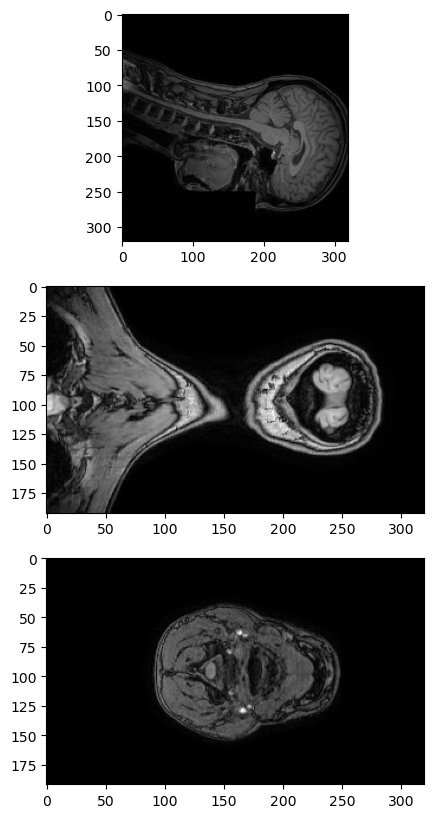

In [7]:
#img_path = os.path.join(TRAIN_IMG_DIR, img[5])
img_path = os.path.join(TRAIN_IMG_DIR, 'sub-vuiisAchieva03_T1w.nii.gz')

image = nib.load(img_path)
image_data = image.get_fdata()

print('shape: {}'.format(image_data.shape))
print('min intensity: {}'.format(np.min(image_data)))
print('max intensity: {}'.format(np.max(image_data))) # max changes for each file

plt.figure(figsize=(15, 10))
plt.subplot(311)
plt.imshow(image_data[100, :, :], cmap='gray')
plt.subplot(312)
plt.imshow(image_data[:, 100, :], cmap='gray')
plt.subplot(313)
plt.imshow(image_data[:, :, 100], cmap='gray')
plt.show()

## Test Normalization

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


shape: (192, 320, 320)
min intensity: 0.0
max intensity: 355888.1319952011


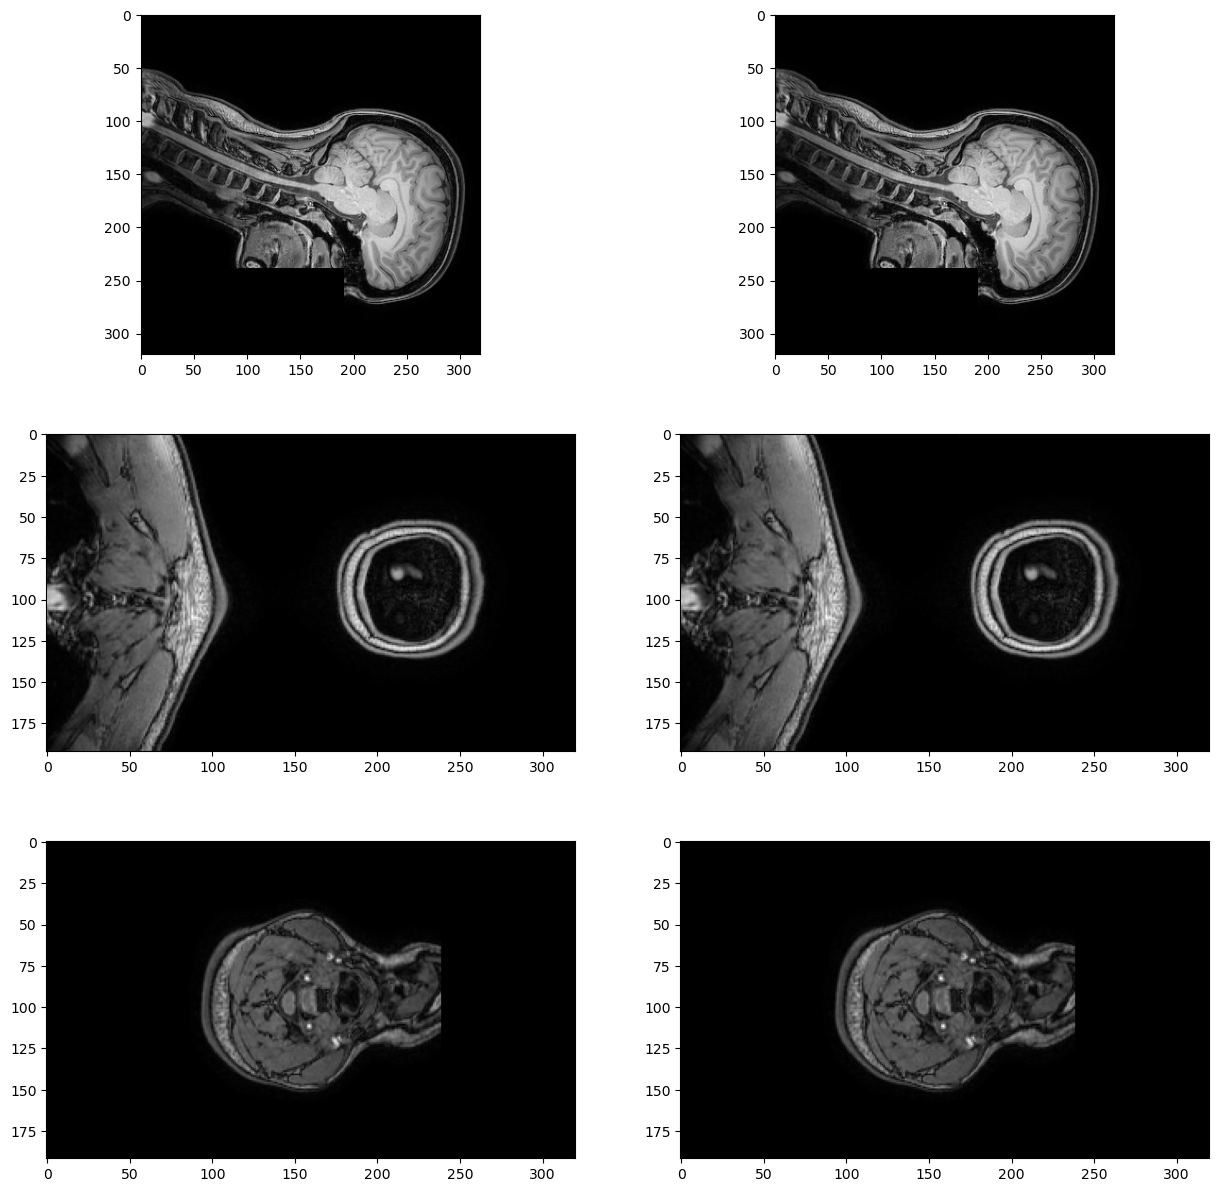

In [8]:
from sklearn.preprocessing import MinMaxScaler
for i in range(len(img)):
    if i == 257:
        img_path = os.path.join(TRAIN_IMG_DIR, img[i])
        
        image = nib.load(img_path)
        image_data = image.get_fdata()

        min = np.min(image_data)
        max = np.max(image_data)

        image_norm = 2 * ((image_data - min) / (max - min)) - 1

        if i == 257:
            print('shape: {}'.format(image_data.shape))
            print('min intensity: {}'.format(np.min(image_data)))
            print('max intensity: {}'.format(np.max(image_data)))
            plt.figure(figsize=(15, 15))
            plt.subplot(321)
            plt.imshow(image_data[100, :, :], cmap='gray')
            plt.subplot(323)
            plt.imshow(image_data[:, 100, :], cmap='gray')
            plt.subplot(325)
            plt.imshow(image_data[:, :, 100], cmap='gray')

            plt.subplot(322)
            plt.imshow(image_norm[100, :, :], cmap='gray')
            plt.subplot(324)
            plt.imshow(image_norm[:, 100, :], cmap='gray')
            plt.subplot(326)
            plt.imshow(image_norm[:, :, 100], cmap='gray')
            plt.show()

        # nib.save(image_norm, os.path.join(root_dir, 'N'+train_files[i]))

## Find min/max intensity in data

In [7]:
# Find max/min of whole dataset
max, min = 0, 0
for i in range(len(img)):

    img_path = os.path.join(TRAIN_IMG_DIR, img[i])

    image = nib.load(img_path)
    image_data = image.get_fdata()

    if np.max(image_data) > max:
        max = np.max(image_data)
        maxfile = img_path

    if np.min(image_data) > min:
        min = np.min(image_data)

print('min intensity: {}'.format(min))
print('max intensity: {}'.format(max))
print(maxfile)

## Test segmentations

(192, 260, 320)


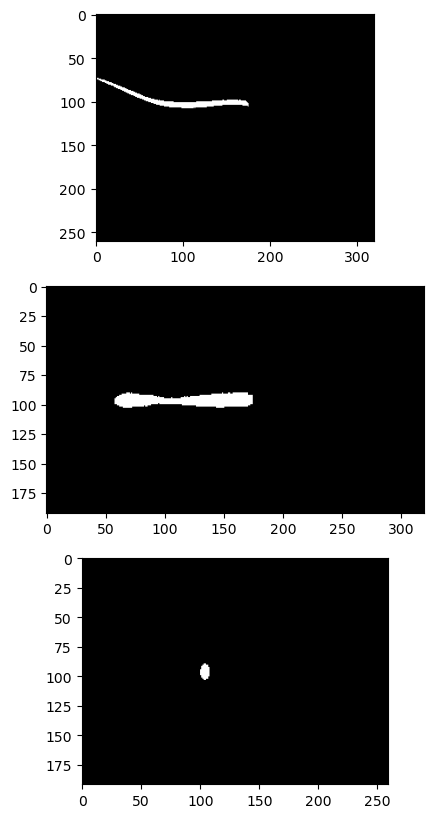

In [3]:
seg_path = os.path.join(TRAIN_SEG_DIR, seg[0])

seg = nib.load(seg_path)
seg_data = seg.get_fdata()

print(seg_data.shape)

plt.figure(figsize=(15, 10))
plt.subplot(311)
plt.imshow(seg_data[100, :, :], cmap='gray')
plt.subplot(312)
plt.imshow(seg_data[:, 100, :], cmap='gray')
plt.subplot(313)
plt.imshow(seg_data[:, :, 100], cmap='gray')
plt.show()

In [4]:
np.max(seg_data)

1.0

# Find Min Spatial Size for D, H, W

In [9]:
min_d, min_h, min_w = 10000, 10000, 10000
for i in range(len(img)):

    img_path = os.path.join(TRAIN_IMG_DIR, img[i])

    image = nib.load(img_path)
    image_data = image.get_fdata()

    if image_data.shape[0] < min_d:
        min_d = image_data.shape[0]
        min_d_path = img_path

    if image_data.shape[1] < min_h:
        min_h = image_data.shape[1]
        min_h_path = img_path

    if image_data.shape[2] < min_w:
        min_w = image_data.shape[2]
        min_w_path = img_path

print('min depth: {} \t file: {}'.format(min_d, min_d_path))
print('min height: {} \t file: {}'.format(min_h, min_h_path))
print('min width: {} \t file: {}'.format(min_w, min_w_path))

min depth: 188 	 file: D:\Jonathan\2_Projects\Fov_Detection\FoV_Data\train_img\T1\sub-brnoUhb01_T1w.nii.gz
min height: 170 	 file: D:\Jonathan\2_Projects\Fov_Detection\FoV_Data\train_img\T1\sub-beijingPrisma04_T1w.nii.gz
min width: 188 	 file: D:\Jonathan\2_Projects\Fov_Detection\FoV_Data\train_img\T1\sub-beijingGE01_T1w.nii.gz


## Test TB

In [3]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

writer = SummaryWriter(r'C:\Users\jh3chu\OneDrive - University of Waterloo\OrthoTron\4. Projects\Spine DTI\UNet_FOV_Detection\logs')

writer.add_image('test', np.random.rand(10, 10), dataformats='HW')

## Mask to BBox

In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import nibabel as nib

c:\ProgramData\Miniconda3\envs\SYDE671\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
USE_NORM = True
if USE_NORM:
    TRAIN_IMG_DIR = r'D:\Jonathan\2_Projects\Fov_Detection\FoV_Data\train_img\T1\Normalized'
else:
    TRAIN_IMG_DIR = r'D:\Jonathan\2_Projects\Fov_Detection\FoV_Data\train_img\T1'
TRAIN_SEG_DIR = r'D:\Jonathan\2_Projects\Fov_Detection\FoV_Data\train_seg\T1'

img = [x for x in os.listdir(TRAIN_IMG_DIR) if x not in ['Normalized', 'Archive']]
seg = [x for x in os.listdir(TRAIN_SEG_DIR) if x not in ['Normalized', 'Archive']]

uint16


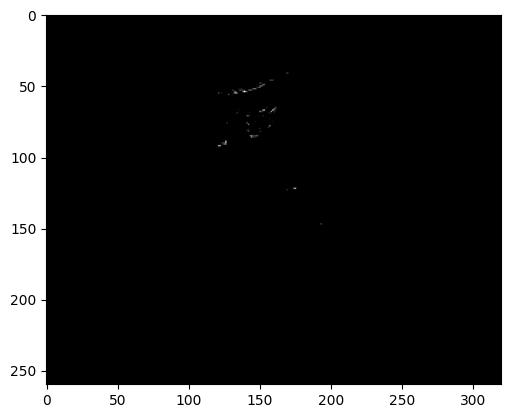

In [3]:
img_path = os.path.join(TRAIN_IMG_DIR, img[0])
seg_path = os.path.join(TRAIN_SEG_DIR, seg[0])

image = nib.load(img_path)
image_data = image.get_fdata()
# image_data_uint = image_data.astype(np.uint8)
# image_data_uint = torch.from_numpy(image_data_uint)

# WRONG DONT NEED ANYMORE, JUST CROP DIRECTLY WITH BBOX COORDS
from skimage import img_as_uint
image_data_uint = img_as_uint(image_data)

img_slice = image_data_uint[100, :, :]
print(img_slice.dtype)
plt.imshow(img_slice, cmap='gray')
plt.show()

In [13]:
segmentation = nib.load(seg_path)
seg_data = segmentation.get_fdata()
seg_data_uint = torch.from_numpy(seg_data.astype(np.uint8))

In [15]:
print(image_data_uint.size())
print(seg_data_uint.size())

torch.Size([192, 260, 320])
torch.Size([192, 260, 320])


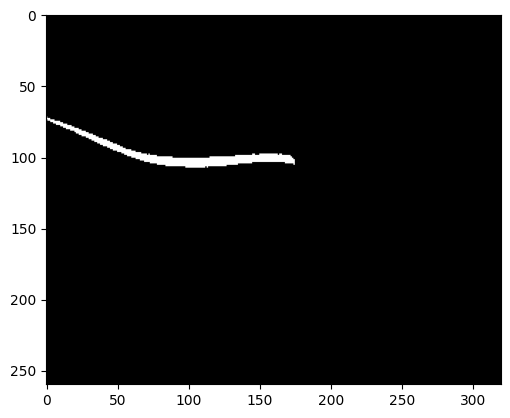

In [16]:
seg_slice = seg_data_uint[100, :, :]
plt.imshow(seg_slice, cmap='gray')
plt.show()

In [17]:
print(seg_slice.size())
print(img_slice.size())
print(seg_slice)

torch.Size([260, 320])
torch.Size([260, 320])
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)


In [18]:
obj_ids = torch.unique(seg_slice)

# first id is the background, so remove it.
obj_ids = obj_ids[1:]

# split the color-encoded mask into a set of boolean masks.
# Note that this snippet would work as well if the masks were float values instead of ints.
masks = seg_slice == obj_ids[:, None, None]

In [19]:
print(masks.size())
print(masks)

torch.Size([1, 260, 320])
tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])


In [20]:
from torchvision.ops import masks_to_boxes

boxes = masks_to_boxes(masks)
print(boxes.size())
print(boxes)

torch.Size([1, 4])
tensor([[  0.,  72., 174., 107.]])


In [22]:
img_slice.dtype

torch.float64

## Create New Channel for label

In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
TRAIN_SEG_DIR = r'D:\Jonathan\2_Projects\Fov_Detection\FoV_Data\train_seg\T1'
seg = [x for x in os.listdir(TRAIN_SEG_DIR) if x not in ['Normalized', 'Archive']]
seg_path = os.path.join(TRAIN_SEG_DIR, seg[0])

In [3]:
segmentation = nib.load(seg_path)
labels = segmentation.get_fdata()

In [4]:
labels_2 = 1 - labels

## Create Train/Val Loss Plots

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
path = r'C:\Users\jh3chu\OneDrive - University of Waterloo\OrthoTron\4. Projects\Spine DTI\UNet_FOV_Detection\model\loss_values\Loss_values.csv'

In [12]:
df = pd.read_csv(path, dtype=np.float32)

In [18]:
epoch = df.iloc[:, 0].to_numpy()
epoch_train_loss = df.iloc[:, 1].to_numpy()
epoch_train_metric = df.iloc[:, 2].to_numpy()
val_loss = df.iloc[:, 3].to_numpy()
val_metric = df.iloc[:, 4].to_numpy()

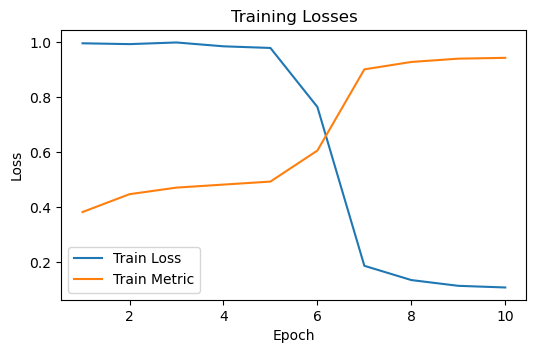

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 3.5)
ax.plot(epoch, epoch_train_loss, label='Train Loss')
ax.plot(epoch, epoch_train_metric, label='Train Metric')
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Training Losses')
plt.show()

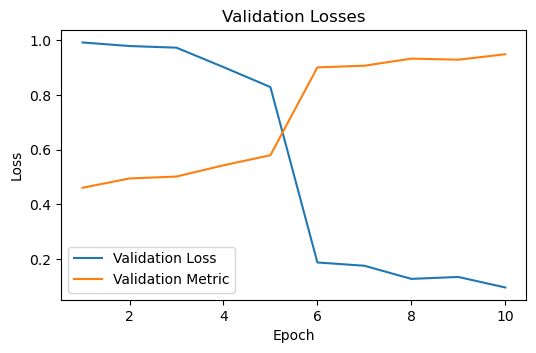

In [33]:
fig2, ax2 = plt.subplots()
fig2.set_size_inches(6, 3.5)
ax2.plot(epoch, val_loss, label='Validation Loss')
ax2.plot(epoch, val_metric, label='Validation Metric')
ax2.legend()
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Validation Losses')
plt.show()